<a href="https://colab.research.google.com/github/Guhan2348519/dl-lab-tasks/blob/main/2348519_DL_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense
from keras.layers import Dropout

In [4]:
data = pd.read_csv('/content/drive/MyDrive/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:

data.SeniorCitizen.replace([0, 1], ["No", "Yes"], inplace=True)
data.TotalCharges.replace([" "], ["0"], inplace=True)
data.TotalCharges = data.TotalCharges.astype(float)
data.drop("customerID", axis=1, inplace=True)
data.Churn.replace(["Yes", "No"], [1, 0], inplace=True)

In [8]:
data = pd.get_dummies(data)

In [11]:
X = data.drop("Churn", axis= 1)
y = data.Churn

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1234)

In [13]:
model = Sequential()

In [17]:

from keras.layers import Dense
from keras.constraints import max_norm

model.add(Dense(16, input_dim=46, activation='relu', kernel_constraint=max_norm(3)))

In [18]:
model.add(Dropout(rate=0.2))

In [20]:

from keras.layers import Dense
from keras.constraints import max_norm

model.add(Dense(8, activation='relu', kernel_constraint=max_norm(3)))

In [21]:
model.add(Dropout(rate=0.2))

In [22]:
model.add(Dense(1, activation='sigmoid'))

In [24]:

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import max_norm

model = Sequential()
model.add(Dense(16, input_dim=46, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(8, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=10)

Epoch 1/40
564/564 [==============================] - 3s 3ms/step - loss: 10.9389 - accuracy: 0.6858 - val_loss: 0.6313 - val_accuracy: 0.7424
Epoch 2/40
564/564 [==============================] - 1s 2ms/step - loss: 2.0562 - accuracy: 0.7265 - val_loss: 0.5898 - val_accuracy: 0.7424
Epoch 3/40
564/564 [==============================] - 1s 3ms/step - loss: 1.2958 - accuracy: 0.7302 - val_loss: 0.5666 - val_accuracy: 0.7459
Epoch 4/40
564/564 [==============================] - 2s 4ms/step - loss: 0.8519 - accuracy: 0.7451 - val_loss: 0.5554 - val_accuracy: 0.7488
Epoch 5/40
564/564 [==============================] - 2s 4ms/step - loss: 0.6190 - accuracy: 0.7515 - val_loss: 0.5392 - val_accuracy: 0.7644
Epoch 6/40
564/564 [==============================] - 1s 3ms/step - loss: 0.5827 - accuracy: 0.7533 - val_loss: 0.5339 - val_accuracy: 0.7686
Epoch 7/40
564/564 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7591 - val_loss: 0.5284 - val_accuracy: 0.7686
Epoch

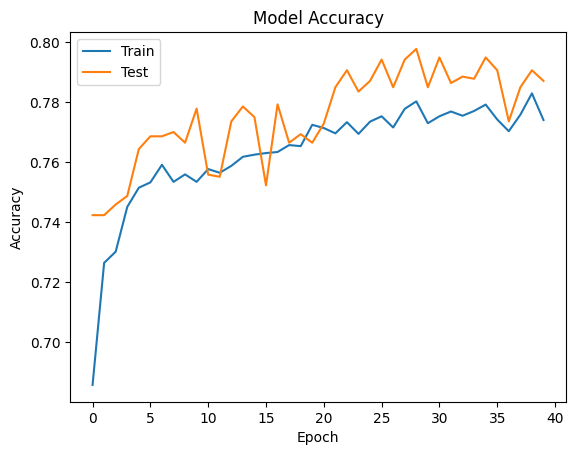

In [28]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

So there we have it. One neural network that produced around 79% accuracy for customer churn. Of course we can spend more time playing around with learning rates, activation functions, number of nodes, number of epochs etc to try and make it more accurate, but hopefully this is a solid baseline to start your investigation